In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r'msc/housearea.csv')
X = df[['area','bedroom','windows']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
new_data = pd.DataFrame([[2600, 4, 3]], columns=['area', 'bedroom', 'windows'])
y_pred = model.predict(new_data)

y_pred

array([[1795000.]])

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



df = pd.read_csv(r"msc/crash.csv")   


X = df[['age', 'speed']]
y = df['fate']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


sample = pd.DataFrame([[28, 120]], columns=['age', 'speed'])
print("Survivability prediction (1=Survived, 0=Not Survived):", model.predict(sample)[0])
print("Probability of survival:", model.predict_proba(sample)[0][1])


Survivability prediction (1=Survived, 0=Not Survived): 1
Probability of survival: 0.873158876309648


R2 Score - Linear Regression: 0.6690412331929895
R2 Score - Polynomial Regression: 0.9973922891706614
Linear Prediction for Level 11: 694333.3333333334
Polynomial Prediction for Level 11: 1780833.3333335826
Polynomial Prediction for Level 12: 3035984.848485564


c:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


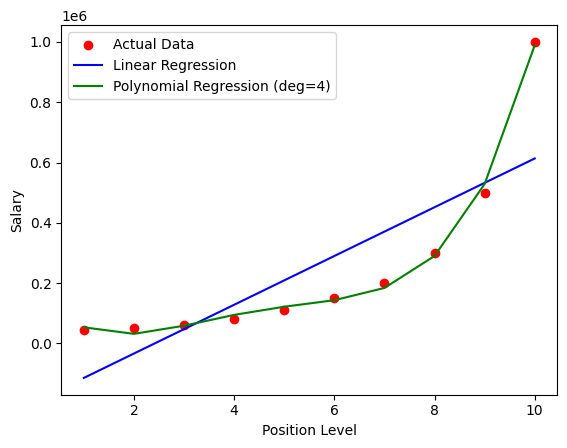

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


df = pd.read_csv(r"msc/position_sal.csv")


X = df[['level ']]   
y = df['salary']


lin_reg = LinearRegression()
lin_reg.fit(X, y)


poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)


y_pred_lin = lin_reg.predict(X)
y_pred_poly = poly_reg.predict(X_poly)

r2_lin = r2_score(y, y_pred_lin)
r2_poly = r2_score(y, y_pred_poly)

print("R2 Score - Linear Regression:", r2_lin)
print("R2 Score - Polynomial Regression:", r2_poly)


level_11 = [[11]]
level_12 = [[12]]

print("Linear Prediction for Level 11:", lin_reg.predict(level_11)[0])
print("Polynomial Prediction for Level 11:", poly_reg.predict(poly.transform(level_11))[0])
print("Polynomial Prediction for Level 12:", poly_reg.predict(poly.transform(level_12))[0])


plt.scatter(X, y, color="red", label="Actual Data")
plt.plot(X, y_pred_lin, color="blue", label="Linear Regression")
plt.plot(X, y_pred_poly, color="green", label="Polynomial Regression (deg=4)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()
